# rsa
This function implements 'random sequential addition' of spheres.  The main benefit of this approach is that sphere overlap can be prevented or controlled. The downside is that the function is a bit on the slow side, though efforts have been made to accelerate it using numba jit.

In [1]:
import porespy as ps
import matplotlib.pyplot as plt
import numpy as np

## Generate a Fresh Image
The function can either add spheres an existing image, or create a new image of the given shape and spheres to that.  Let's start with an empty image, and set the void fraction to a low value:

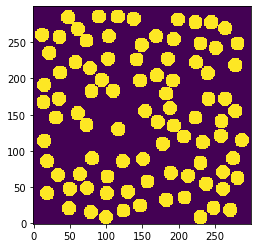

In [2]:
im = ps.generators.RSA(im_or_shape=[300, 300], r=10, volume_fraction=0.3)
plt.imshow(im, origin='lower', interpolation='none');

Now let's fill up the remaining space with as many smaller spheres as possible:

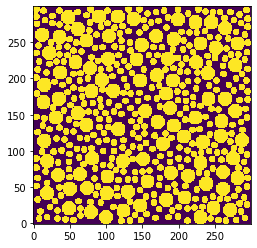

In [3]:
im = ps.generators.RSA(im_or_shape=im, r=5, volume_fraction=1)
plt.imshow(im, origin='lower', interpolation='none');

## Controlling Edges
Spheres can either be fully contained within the image or be truncated at the edges:

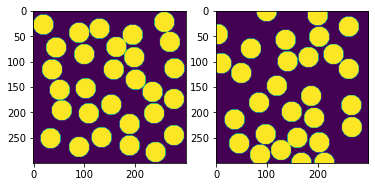

In [4]:
im1 = ps.generators.RSA(im_or_shape=[300, 300], r=20, volume_fraction=0.4, mode='contained')
im2 = ps.generators.RSA(im_or_shape=[300, 300], r=20, volume_fraction=0.4, mode='extended')
fig, ax = plt.subplots(1, 2)
ax[0].imshow(im1)
ax[1].imshow(im2);

## Allowing Overlap or Adding Clearance
Spheres can be made to partially overlap, the so called 'cherry pit' model, or to have some clearance:

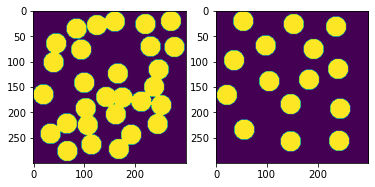

In [5]:
im1 = ps.generators.RSA(im_or_shape=[300, 300], r=20, volume_fraction=0.4, clearance=-4)
im2 = ps.generators.RSA(im_or_shape=[300, 300], r=20, volume_fraction=0.4, clearance=10)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(im1)
ax[1].imshow(im2);

When adding additional sphers to an existing image, the clearance only applies to new spheres.  To enforce clearance between the existing spheres you can dilate them by the amount of clearance desired (or erode them if overlap is desired).  In this case you'll want to set ``return_sphers=True`` to obtain an image of only the new spheres, which can be added to the original ones:

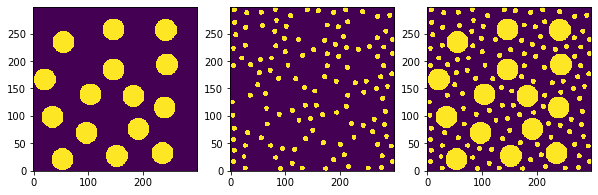

In [6]:
im3 = ps.filters.fftmorphology(im=im2, strel=ps.tools.ps_disk(5), mode='dilation')
im4 = ps.generators.RSA(im_or_shape=im3, r=5, clearance=5, return_spheres=True)
im5 = im2 + im4
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].imshow(im2, origin='lower', interpolation='none')
ax[1].imshow(im4, origin='lower', interpolation='none')
ax[2].imshow(im5, origin='lower', interpolation='none');

## Controlling Porosity
By default it will try to insert as many spheres as possible.  This can be controlled by setting the volume fraction or limiting the number of spheres inserted:

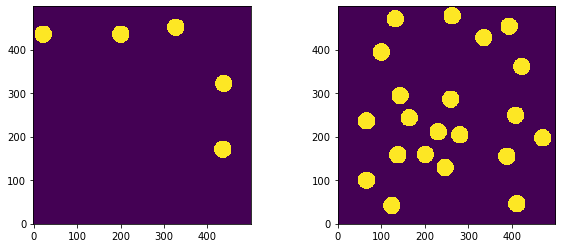

In [7]:
im1 = ps.generators.RSA([500, 500], r=20, clearance=5, n_max=5)
im2 = ps.generators.RSA([500, 500], r=20, clearance=5, volume_fraction=0.1)
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[1].imshow(im2, origin='lower', interpolation='none');

Note that this function returns the spheres as ``True`` which usually indicates the pore phase in porespy, so these will treated as images of holes.  If you intended to make an image of sphers, just invert the image:

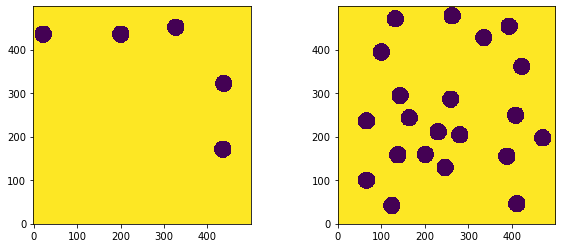

In [8]:
im1 = ~im1
im2 = ~im2
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[1].imshow(im2, origin='lower', interpolation='none');